In [6]:
using Plots
include("serialized_dla_modules.jl")

Main.Random_walker

#### Sample Initial State of Walkers

Note that due to the `floor` function operated on the x and y component of the particle's initial positionsm the possible initial states are not centered at 0, 0, and are shifted instead towards the -x direction.

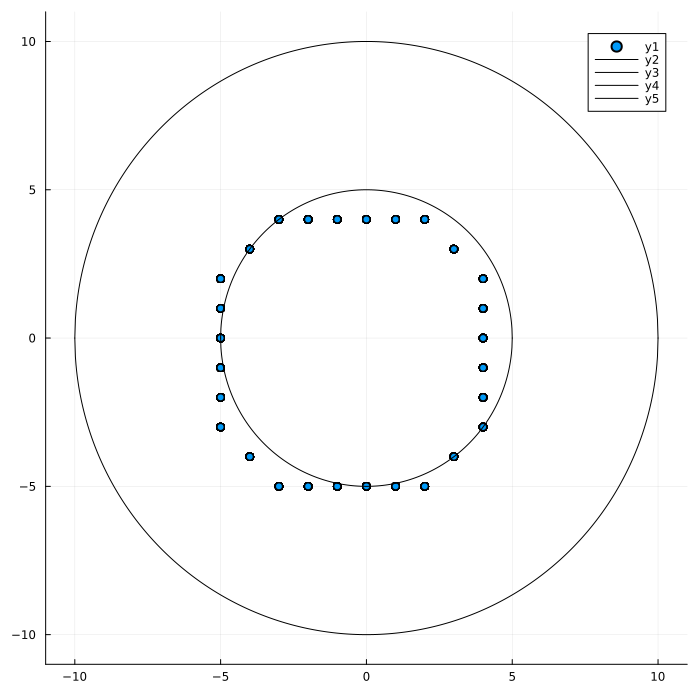

In [6]:
outer_birth_radius = 10.0
inner_birth_radius = 0.5 * outer_birth_radius
particle_number = 10000

walker_ensemble_initial_state = zeros(Float64, (2, particle_number))
for particle in 1:particle_number
    walker_ensemble_initial_state[:, particle] = Random_walker.initialize_randomwalker(inner_birth_radius)
end

#plotting inner and outer birth rings
x_inner_circle = [x for x in range(-1 * inner_birth_radius, inner_birth_radius, 1000)]
x_outer_circle = [x for x in range(-1 * outer_birth_radius, outer_birth_radius, 1000)]

y_inner_circle = (inner_birth_radius^2 .- x_inner_circle.^2).^0.5
y_outer_circle = (outer_birth_radius^2 .- x_outer_circle.^2).^0.5

scatter(walker_ensemble_initial_state[1, :], walker_ensemble_initial_state[2, :],
    xlims = (-1 * outer_birth_radius - 1, outer_birth_radius + 1), 
    ylims = (-1 * outer_birth_radius - 1, outer_birth_radius + 1), size = (700, 700))
plot!(x_inner_circle, y_inner_circle, color = "black")
plot!(x_inner_circle, (-1).* y_inner_circle, color = "black")
plot!(x_outer_circle, y_outer_circle, color = "black")
plot!(x_outer_circle, (-1).*y_outer_circle, color = "black")

#### Sample Random Walk

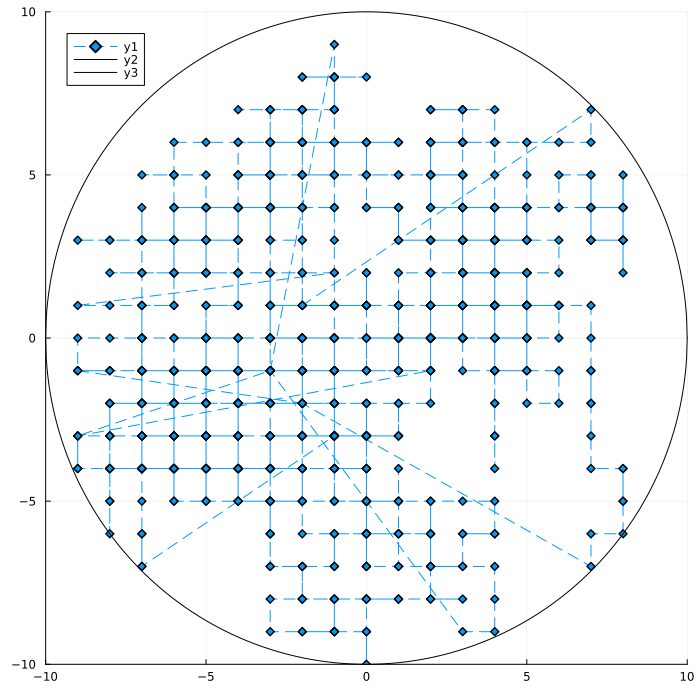

In [7]:
death_radius = 10.0
birth_radius = 0.25 * death_radius
steps = 1000

#creating data points for the death circle
x_points = [x for x in range(-1*death_radius, death_radius, 1000)]
upper_circle_boundary = (death_radius^2 .- x_points.^2).^0.5
lower_circle_boundary = (-1).*upper_circle_boundary


#creating single trajectory for the walker
walker_trajectory = Random_walker.random_walk_generator(steps, death_radius, birth_radius)


#plot of random walk to be saved
plot(walker_trajectory[1, :], walker_trajectory[2, :], xlims = (-1 * death_radius, death_radius), 
            ylims = (-1 * death_radius, death_radius), marker = :d, linestyles = :dash, size = (700, 700))
plot!(x_points, upper_circle_boundary, color = "black")
plot!(x_points, lower_circle_boundary, color = "black")
savefig("image_results/sample_randomwalk.png"); #saving plot


#plot of random walk to be shown in the notebook
plot(walker_trajectory[1, :], walker_trajectory[2, :], xlims = (-1 * death_radius, death_radius), 
            ylims = (-1 * death_radius, death_radius), marker = :d, linestyles = :dash, size = (700, 700))
plot!(x_points, upper_circle_boundary, color = "black")
plot!(x_points, lower_circle_boundary, color = "black")


#### Sample DLA

In [17]:
particle_number = 2500
maximum_radius = 100.0

@time cluster_aggregate = Random_walker.serialized_dla(particle_number, maximum_radius);


 Walker # 2500 done!659.570285 seconds (6.82 G allocations: 732.313 GiB, 10.11% gc time)


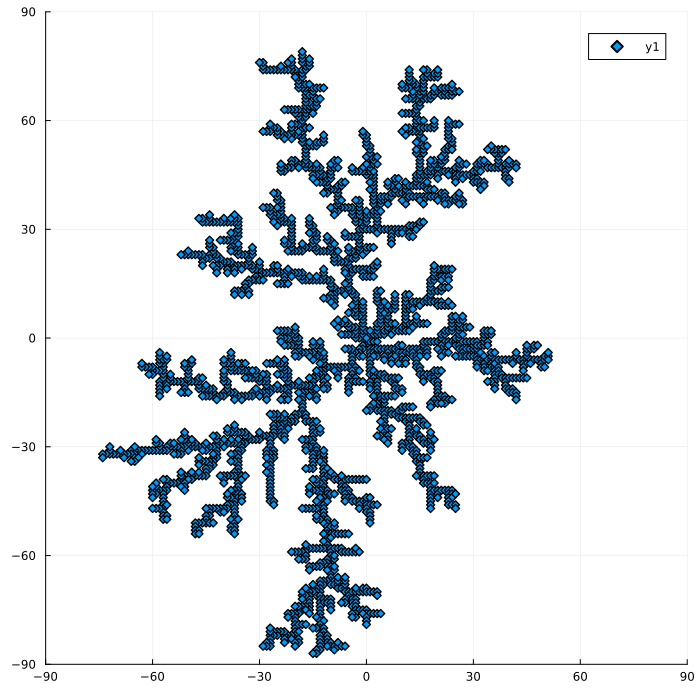

In [26]:
figure_lim = 90
scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-1*figure_lim, figure_lim), 
            ylims = (-1*figure_lim, figure_lim), size = (700, 700), marker = :diamond )

savefig("image_results/sample cluster aggregate.png")

scatter(cluster_aggregate[1, : ], cluster_aggregate[2, :], xlims = (-1*figure_lim, figure_lim), 
            ylims = (-1*figure_lim, figure_lim), size = (700, 700), marker = :diamond )